# NN – Домашнее задание 2

**Дедлайн:** 23:59, 27 июля

### Вам необходимо:
Принять участие в [командном соревновании на Kaggle:](https://www.kaggle.com/competitions/teta-nn-2-2025)

В рамках этого соревнования перед вами стоит две задачи:
1. Написать и обучить самописную архитектуру модели на **PyTorch**.
2. Получить высокий **score** на финальном leaderboard.

### Требования к `ipynb`:
- В нем должен быть сохранен **output** ячеек (не очищен).
- Внутри ноутбука указать:
  1. Ваши ники на Kaggle и скриншот с итоговой позицией на leaderboard  
     *(важно — после завершения соревнования)*.
  2. Ваши ФИО.

### Оценивание соревнования:
**ДЗ 2 — макс. 10 баллов**

- Корректная реализация и обучение самописной архитектуры: **5 баллов**.

**Дополнительно баллы за ноутбук:**
1. Логичность и корректность кода и комментариев.
2. Корректная валидация модели на отложенной выборке.
3. Применение дополнительных способов обработки данных.
4. Использование открытых моделей.

**Баллы за итоговый score команды:**
- Позиция **[1; 3]** на итоговом leaderboard: **+5 баллов**.
- Позиция **[4; 5]** на итоговом leaderboard: **+3 балла**.
- Позиция **[6; 7]** на итоговом leaderboard: **+1 балл**.

**Итог:**
- Зачет на 4: **7 баллов**.
- Зачет на 5: **8–10 баллов**.

### Дополнительно (челлендж «Турнир братства»):
- Топ-3 команд на итоговом leaderboard: **+5 баллов**.
- Побили baseline метрику — можно написать отчет в общий чат по шаблону: **+2 балла**.

**Шаблон для +2 баллов:**
1. Итоговая позиция в соревновании.
2. Intro.
3. Анализ того, что пробовали.
4. Анализ причин неудач (или потенциальных проблем).
5. Анализ применимости решения в бизнес-процессах.
6. Outro.
7. Тегнуть Арину, чтобы начислила баллы.

### Как отправить результат:
1. Ссылка на файл с ноутбуком в облачном хранилище (Google Диск и т.д.).
2. Ссылка на файл с ноутбуком в GitHub.

**Важно:** ссылки должны быть рабочие и с открытым доступом для скачивания.

Желаем удачи!

### Информация об участнике соревнования:

1) Ник на Kaggle - **Vladimir Smirnovve** (участвовал в соревновании самостоятельно, без команды)
2) Скриншот с итоговой позицией на leaderboard (находится по [ссылке](https://drive.google.com/drive/folders/1N9YE9Lqhgo54NuK2N6nBHN79yku_9bD1?usp=sharing))

   - **9 место**
   - **Private Score: 0.60702**
   - **Public score: 0.62245**
4) ФИО - **Смирнов Владимир Евгеньевич**

## Аннотация

В итоговом рейтинге соревнования я занял (если бы сдавал задание до окончания дедлайна; о причинах поздней сдачи написал в сообщении; для читающих ноутбук в двух словах - брал перерыв от учебы для поступления в магистратуру) **9 место** (по обоим лидербордам) с результатами:
   - **Private Score: 0.60702**
   - **Public score: 0.62245**

### Использованная архитектура

**Siamese Neural Network с ResNet18**.

#### Что я пробовал

- **Базовый пайплайн**: Siamese Neural Network с ResNet18 в качестве энкодера.
- Загрузил предобученный ResNet18 с ImageNet, заморозив его веса для быстрого обучения.
- Использовал torch.cat для объединения признаков.
- Обучал простой MLP-классификатор на объединенных признаках.

#### Что пошло не так / могло пойти не так

- Отсутствие кросс-валидации - для получения стабильного результата я не смог провести полноценную k-fold кросс-валидацию, что могло бы улучшить финальный результат и дать более надежную оценку качества модели.

#### Применимость в бизнес-процессах

Моё решение может быть использовано в различных бизнес-процессах, связанных с визуальным контентом:

- Контроль качества изображений - автоматическая фильтрация и оценка качества фотографий, например, в e-commerce или на платформах для публикации контента;
- Генерация изображений - сравнение качества сгенерированных изображений с эталонными.

#### Самописная архитектура находится в самом низу ноутбука!

### Библиотеки

In [1]:
!pip install --upgrade scikit-learn
!pip install nltk razdel pymorphy3 wordcloud

In [2]:
# --- Системные и общие ---
import os
import math
import random
import re
import warnings
from collections import Counter
from functools import lru_cache

import numpy as np
import pandas as pd
from scipy.sparse import hstack, issparse
from tqdm.auto import tqdm
from tqdm.notebook import tqdm as tqdm_notebook
from bs4 import BeautifulSoup
from IPython.display import display

warnings.filterwarnings('ignore')

# --- Визуализация ---
import matplotlib.pyplot as plt
import seaborn as sns
from graphviz import Digraph
from wordcloud import WordCloud

# --- NLP и лингвистика ---
import nltk
from nltk.corpus import stopwords
from razdel import tokenize as razdel_tokenize
import pymorphy3

# --- PyTorch ---
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
from torch.utils.tensorboard import SummaryWriter

# --- Torchvision ---
import torchvision
import torchvision.transforms as transforms
from torchvision.models import resnet18, ResNet18_Weights

# --- Hugging Face / Transformers ---
from transformers import (
    AutoTokenizer,
    AutoModel,
    AutoModelForSequenceClassification,
    Trainer,
    TrainingArguments
)
from datasets import Dataset as HFDataset

# --- Scikit-learn ---
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, confusion_matrix, classification_report

# --- Константы и настройка среды ---
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)
torch.manual_seed(RANDOM_STATE)

# --- Инициализация лидерборда ---
leaderboard = pd.DataFrame(columns=['Метод', 'ROC_AUC_Score'])


import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import io
from tqdm.notebook import tqdm
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

# Для воспроизводимости результатов
torch.manual_seed(42)
np.random.seed(42)

2025-08-21 07:21:40.838866: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755760900.863747     100 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755760900.871273     100 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
# Определяем устройство
if torch.backends.mps.is_available():
    device = torch.device("mps")
    torch.mps.manual_seed(RANDOM_STATE)
elif torch.cuda.is_available():
    device = torch.device("cuda")
    torch.cuda.manual_seed_all(RANDOM_STATE)
else:
    device = torch.device("cpu")

print(f"Используемое устройство: {device}")

Используемое устройство: cuda


In [4]:
# Пути к файлам
train_path = '/kaggle/input/teta-nn-2-2025/train.parquet'
test_path = '/kaggle/input/teta-nn-2-2025/test.parquet'

# Загружаем данные из файлов соревнования
if os.path.exists(train_path) and os.path.exists(test_path):
    full_train_df = pd.read_parquet(train_path)
    test_df = pd.read_parquet(test_path)


Пример данных из обучающего набора (df_train):


,image_1,image_2,is_image1_better
0,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,b'RIFF\x06%\x01\x00WEBPVP8 \xfa$\x01\x00\xb0A\...,1
1,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,b'RIFFL\x99\x01\x00WEBPVP8 @\x99\x01\x00p\xbb\...,0
2,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"b'RIFF8@\x02\x00WEBPVP8 ,@\x02\x00\x106\t\x9d\...",1
3,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,b'RIFFv\n\x01\x00WEBPVP8 j\n\x01\x00p\xbe\x04\...,0
4,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,b'RIFF\xde|\x00\x00WEBPVP8 \xd2|\x00\x00PH\x03...,0



Пример первого изображения из первой строки:


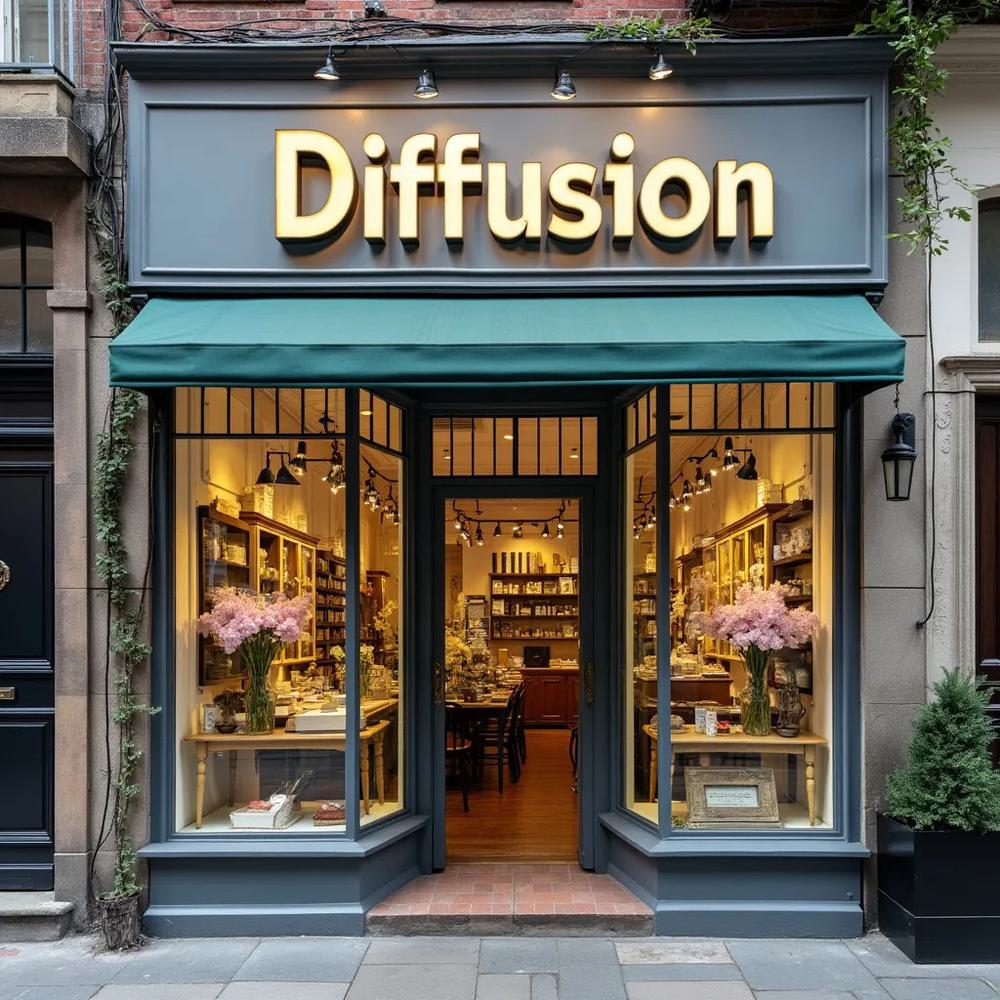

In [5]:
print("\nПример данных из обучающего набора (df_train):")
display(full_train_df.head())

# Посмотрим на одно из сгенерированных изображений
print("\nПример первого изображения из первой строки:")
display(Image.open(io.BytesIO(full_train_df.iloc[0]['image_1'])))

In [6]:
class ImagePairDataset(Dataset):
    """
    Класс Dataset для загрузки и предобработки пар изображений.
    """
    def __init__(self, dataframe, transform=None):
        self.dataframe = dataframe
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        # Получаем строку из DataFrame по индексу
        row = self.dataframe.iloc[idx]

        # Декодируем байты в изображения
        # io.BytesIO создает в памяти файлоподобный объект из байтовой строки
        try:
            image1 = Image.open(io.BytesIO(row['image_1'])).convert('RGB')
            image2 = Image.open(io.BytesIO(row['image_2'])).convert('RGB')
        except Exception as e:
            print(f"Ошибка загрузки изображения по индексу {idx}: {e}")
            # В реальном проекте здесь может быть логика для возврата "пустого" тензора
            raise

        # Применяем трансформации, если они заданы
        if self.transform:
            image1 = self.transform(image1)
            image2 = self.transform(image2)

        # Метка: 1.0, если первое изображение лучше, иначе 0.0
        label = torch.tensor([float(row['is_image1_better'])], dtype=torch.float32)

        return image1, image2, label

In [7]:
class SiameseComparator(nn.Module):
    def __init__(self, freeze_encoder=True):
        super(SiameseComparator, self).__init__()
        
        # Загружаем предобученный ResNet18
        self.encoder = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)
        
        num_features = self.encoder.fc.in_features
        
        # Fine-tuning: размораживаем часть слоев
        if not freeze_encoder:
            # Размораживаем только последний блок ResNet
            for param in self.encoder.layer4.parameters():
                param.requires_grad = True
            for param in self.encoder.fc.parameters():
                param.requires_grad = True
        
        # Заменяем последний классификационный слой
        self.encoder.fc = nn.Identity()

        # Создаем новую "голову" для классификации с учетом diff и mul
        # Входной размер: num_features * 4 (features1, features2, diff, mul)
        self.classifier_head = nn.Sequential(
            nn.Linear(num_features * 4, 1024),
            nn.BatchNorm1d(1024),             
            nn.GELU(),                        
            nn.Dropout(0.5),
            nn.Linear(1024, 256),              
            nn.BatchNorm1d(256),
            nn.GELU(),
            nn.Dropout(0.4),                  
            nn.Linear(256, 1)                 
        )

    def forward(self, img1, img2):
        # Пропускаем каждое изображение через энкодер
        features1 = self.encoder(img1)
        features2 = self.encoder(img2)
        
        # Вычисляем разность и произведение признаков
        # Данную идею заимствовал у коллег по курсу - не сказать, что мне дало значительный прирост
        diff_features = features1 - features2
        mul_features = features1 * features2
        
        # Конкатенируем все четыре вектора
        combined_features = torch.cat((features1, features2, diff_features, mul_features), dim=1)
        
        output = self.classifier_head(combined_features)
        return output

In [8]:
def train_model(model, dataloader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    correct_predictions = 0
    total_samples = 0

    for images1, images2, labels in tqdm(dataloader, desc="Обучение"):
        images1, images2, labels = images1.to(device), images2.to(device), labels.to(device)
        
        optimizer.zero_grad()
        
        outputs = model(images1, images2) 
        loss = criterion(outputs, labels) 
        
        loss.backward() 
        optimizer.step() 
        
        running_loss += loss.item() * images1.size(0)
        preds = torch.sigmoid(outputs) > 0.5
        correct_predictions += (preds == labels).sum().item()
        total_samples += labels.size(0)

    epoch_loss = running_loss / total_samples
    epoch_acc = correct_predictions / total_samples
    return epoch_loss, epoch_acc

def evaluate_model(model, dataloader, criterion, device):
    model.eval() 
    running_loss = 0.0
    correct_predictions = 0
    total_samples = 0
    

    all_preds_logits = []
    all_labels = []

    with torch.no_grad(): 
        for images1, images2, labels in tqdm(dataloader, desc="Оценка"):
            images1, images2, labels = images1.to(device), images2.to(device), labels.to(device)
            
            outputs = model(images1, images2)
            loss = criterion(outputs, labels)
            
            running_loss += loss.item() * images1.size(0)
            preds = torch.sigmoid(outputs) > 0.5
            correct_predictions += (preds == labels).sum().item()
            total_samples += labels.size(0)
            
            all_preds_logits.append(outputs.cpu())
            all_labels.append(labels.cpu())

    epoch_loss = running_loss / total_samples
    epoch_acc = correct_predictions / total_samples
    
    all_preds_logits = torch.cat(all_preds_logits)
    all_labels = torch.cat(all_labels)
    
    return epoch_loss, epoch_acc, all_preds_logits, all_labels

In [9]:
# Трансформации для тренировочного набора
train_transforms = transforms.Compose([
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)), 
    transforms.RandomHorizontalFlip(),                  
    transforms.RandomRotation(15),                       
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.GaussianBlur(kernel_size=3),             
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Трансформации для валидационного/тестового набора (без аугментации)
val_test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [10]:
# --- 2. Разделение данных и создание DataLoaders ---
# Разбиваем исходный train на обучающую и валидационную выборки
train_df, val_df = train_test_split(
    full_train_df,
    test_size=0.2,
    random_state=RANDOM_STATE,
    stratify=full_train_df['is_image1_better']
)

train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)

test_df = pd.read_parquet(test_path)

# Создаем экземпляры Dataset
train_dataset = ImagePairDataset(train_df, transform=train_transforms)
val_dataset = ImagePairDataset(val_df, transform=val_test_transforms)


# --- Подготовка данных ---

test_df = pd.read_parquet(test_path)

class TestImagePairDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        self.dataframe = dataframe
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        row = self.dataframe.iloc[idx]
        
        # Декодируем байты в изображения
        image1 = Image.open(io.BytesIO(row['image_1'])).convert('RGB')
        image2 = Image.open(io.BytesIO(row['image_2'])).convert('RGB')
        
        # Применяем трансформации
        if self.transform:
            image1 = self.transform(image1)
            image2 = self.transform(image2)
        
        return image1, image2

In [11]:
# Гиперпараметры
BATCH_SIZE = 16
LEARNING_RATE = 1e-5
NUM_EPOCHS = 30

In [12]:
test_dataset = TestImagePairDataset(test_df, transform=val_test_transforms)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=0)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=0)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=0)

In [13]:
# 3. Инициализируем модель, функцию потерь и оптимизатор
model = SiameseComparator().to(device)

criterion = nn.BCEWithLogitsLoss()

optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 167MB/s] 


In [14]:
history = {'train_loss': [], 'train_acc': []}

for epoch in range(NUM_EPOCHS):
    print(f"\n--- Эпоха {epoch + 1}/{NUM_EPOCHS} ---")
    
    train_loss, train_acc = train_model(model, train_loader, criterion, optimizer, device)
    
    print(f"Эпоха {epoch + 1} | Потери на обучении: {train_loss:.4f} | Точность на обучении: {train_acc:.4f}")
    
    history['train_loss'].append(train_loss)
    history['train_acc'].append(train_acc)


--- Эпоха 1/30 ---


Обучение:   0%|          | 0/436 [00:00<?, ?it/s]

Эпоха 1 | Потери на обучении: 0.6908 | Точность на обучении: 0.5518

--- Эпоха 2/30 ---


Обучение:   0%|          | 0/436 [00:00<?, ?it/s]

Эпоха 2 | Потери на обучении: 0.6622 | Точность на обучении: 0.6007

--- Эпоха 3/30 ---


Обучение:   0%|          | 0/436 [00:00<?, ?it/s]

Эпоха 3 | Потери на обучении: 0.6474 | Точность на обучении: 0.6250

--- Эпоха 4/30 ---


Обучение:   0%|          | 0/436 [00:00<?, ?it/s]

Эпоха 4 | Потери на обучении: 0.6316 | Точность на обучении: 0.6431

--- Эпоха 5/30 ---


Обучение:   0%|          | 0/436 [00:00<?, ?it/s]

Эпоха 5 | Потери на обучении: 0.6186 | Точность на обучении: 0.6622

--- Эпоха 6/30 ---


Обучение:   0%|          | 0/436 [00:00<?, ?it/s]

Эпоха 6 | Потери на обучении: 0.6138 | Точность на обучении: 0.6655

--- Эпоха 7/30 ---


Обучение:   0%|          | 0/436 [00:00<?, ?it/s]

Эпоха 7 | Потери на обучении: 0.6047 | Точность на обучении: 0.6792

--- Эпоха 8/30 ---


Обучение:   0%|          | 0/436 [00:00<?, ?it/s]

Эпоха 8 | Потери на обучении: 0.5904 | Точность на обучении: 0.6861

--- Эпоха 9/30 ---


Обучение:   0%|          | 0/436 [00:00<?, ?it/s]

Эпоха 9 | Потери на обучении: 0.5848 | Точность на обучении: 0.6907

--- Эпоха 10/30 ---


Обучение:   0%|          | 0/436 [00:00<?, ?it/s]

Эпоха 10 | Потери на обучении: 0.5719 | Точность на обучении: 0.7002

--- Эпоха 11/30 ---


Обучение:   0%|          | 0/436 [00:00<?, ?it/s]

Эпоха 11 | Потери на обучении: 0.5659 | Точность на обучении: 0.7118

--- Эпоха 12/30 ---


Обучение:   0%|          | 0/436 [00:00<?, ?it/s]

Эпоха 12 | Потери на обучении: 0.5556 | Точность на обучении: 0.7130

--- Эпоха 13/30 ---


Обучение:   0%|          | 0/436 [00:00<?, ?it/s]

Эпоха 13 | Потери на обучении: 0.5423 | Точность на обучении: 0.7252

--- Эпоха 14/30 ---


Обучение:   0%|          | 0/436 [00:00<?, ?it/s]

Эпоха 14 | Потери на обучении: 0.5252 | Точность на обучении: 0.7329

--- Эпоха 15/30 ---


Обучение:   0%|          | 0/436 [00:00<?, ?it/s]

Эпоха 15 | Потери на обучении: 0.5212 | Точность на обучении: 0.7430

--- Эпоха 16/30 ---


Обучение:   0%|          | 0/436 [00:00<?, ?it/s]

Эпоха 16 | Потери на обучении: 0.4989 | Точность на обучении: 0.7556

--- Эпоха 17/30 ---


Обучение:   0%|          | 0/436 [00:00<?, ?it/s]

Эпоха 17 | Потери на обучении: 0.4890 | Точность на обучении: 0.7661

--- Эпоха 18/30 ---


Обучение:   0%|          | 0/436 [00:00<?, ?it/s]

Эпоха 18 | Потери на обучении: 0.4730 | Точность на обучении: 0.7688

--- Эпоха 19/30 ---


Обучение:   0%|          | 0/436 [00:00<?, ?it/s]

Эпоха 19 | Потери на обучении: 0.4566 | Точность на обучении: 0.7816

--- Эпоха 20/30 ---


Обучение:   0%|          | 0/436 [00:00<?, ?it/s]

Эпоха 20 | Потери на обучении: 0.4454 | Точность на обучении: 0.7905

--- Эпоха 21/30 ---


Обучение:   0%|          | 0/436 [00:00<?, ?it/s]

Эпоха 21 | Потери на обучении: 0.4239 | Точность на обучении: 0.8045

--- Эпоха 22/30 ---


Обучение:   0%|          | 0/436 [00:00<?, ?it/s]

Эпоха 22 | Потери на обучении: 0.4117 | Точность на обучении: 0.8098

--- Эпоха 23/30 ---


Обучение:   0%|          | 0/436 [00:00<?, ?it/s]

Эпоха 23 | Потери на обучении: 0.3916 | Точность на обучении: 0.8193

--- Эпоха 24/30 ---


Обучение:   0%|          | 0/436 [00:00<?, ?it/s]

Эпоха 24 | Потери на обучении: 0.3762 | Точность на обучении: 0.8319

--- Эпоха 25/30 ---


Обучение:   0%|          | 0/436 [00:00<?, ?it/s]

Эпоха 25 | Потери на обучении: 0.3593 | Точность на обучении: 0.8396

--- Эпоха 26/30 ---


Обучение:   0%|          | 0/436 [00:00<?, ?it/s]

Эпоха 26 | Потери на обучении: 0.3622 | Точность на обучении: 0.8396

--- Эпоха 27/30 ---


Обучение:   0%|          | 0/436 [00:00<?, ?it/s]

Эпоха 27 | Потери на обучении: 0.3378 | Точность на обучении: 0.8536

--- Эпоха 28/30 ---


Обучение:   0%|          | 0/436 [00:00<?, ?it/s]

Эпоха 28 | Потери на обучении: 0.3304 | Точность на обучении: 0.8532

--- Эпоха 29/30 ---


Обучение:   0%|          | 0/436 [00:00<?, ?it/s]

Эпоха 29 | Потери на обучении: 0.3254 | Точность на обучении: 0.8575

--- Эпоха 30/30 ---


Обучение:   0%|          | 0/436 [00:00<?, ?it/s]

Эпоха 30 | Потери на обучении: 0.3180 | Точность на обучении: 0.8665


In [15]:
print("\n--- Генерация предсказаний на тестовом наборе ---")

model.eval()

all_preds_probs = []

with torch.no_grad():
    for images1, images2 in tqdm(test_loader, desc="Генерация предсказаний"):
        images1 = images1.to(device)
        images2 = images2.to(device)
        
        outputs = model(images1, images2)
        
        # Преобразуем логиты в вероятности
        probs = torch.sigmoid(outputs)
        
        all_preds_probs.append(probs.cpu())

# Объединяем предсказания в один массив
submission_preds = torch.cat(all_preds_probs).numpy().flatten()


--- Генерация предсказаний на тестовом наборе ---


Генерация предсказаний:   0%|          | 0/269 [00:00<?, ?it/s]

In [16]:
# submission
print("Создание DataFrame для submission...")

submission_df = pd.DataFrame({
    'index': test_df.index,
    'is_image1_better': submission_preds
})

submission_df.to_csv('submission.csv', index=False)
print("Файл submission.csv успешно создан!")

Создание DataFrame для submission...
Файл submission.csv успешно создан!


### Архитектура

In [23]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        
        # Свёрточный блок 1
        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        
        # Свёрточный блок 2
        self.conv2 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        
        # Свёрточный блок 3
        self.conv3 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        
        # Полносвязные слои (MLP)
        self.fc = nn.Sequential(
            nn.Linear(64 * 28 * 28, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, 1)
        )

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        
        x = x.view(x.size(0), -1) 
        
        x = self.fc(x)
        return x

In [24]:
class CustomSiameseModel(nn.Module):
    def __init__(self):
        super(CustomSiameseModel, self).__init__()
        
        # Используем нашу самописную CNN в качестве энкодера
        self.encoder = SimpleCNN()
        
        # Важно! Нам нужно определить размерность выходного вектора нашего энкодера
        # Выходной слой SimpleCNN имеет размерность 512, но на конце у нас уже есть
        # выходной слой на 1 нейрон. Поэтому мы должны изменить архитектуру.
        # Более правильный подход - это получить эмбеддинги перед финальным слоем
        
        num_features = 512
        
        # Создаем новую "голову" для классификации объединенных признаков
        self.classifier_head = nn.Sequential(
            nn.Linear(num_features * 2, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, 1) 
        )

    def forward(self, img1, img2):
        features1 = self.encoder(img1)
        features2 = self.encoder(img2)
        
        combined_features = torch.cat((features1, features2), dim=1)
        
        output = self.classifier_head(combined_features)
        return output

In [25]:
# Трансформации
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
])

val_test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Инициализация Dataset и DataLoader
train_dataset = ImagePairDataset(train_df, transform=train_transforms)
val_dataset = ImagePairDataset(val_df, transform=val_test_transforms)
test_dataset = TestImagePairDataset(test_df, transform=val_test_transforms)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

In [26]:
# Гиперпараметры
BATCH_SIZE = 16
LEARNING_RATE = 1e-5
NUM_EPOCHS = 20

In [27]:
best_val_auc = 0.0
best_model_path = 'best_model.pth'

model = SiameseComparator().to(device)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

# Цикл обучения
for epoch in range(NUM_EPOCHS):
    train_loss, train_acc = train_model(model, train_loader, criterion, optimizer, device)
    
    val_loss, val_acc, val_preds_logits, val_labels = evaluate_model(model, val_loader, criterion, device)
    
    val_preds_probs = torch.sigmoid(val_preds_logits).numpy()
    val_roc_auc = roc_auc_score(val_labels.numpy(), val_preds_probs)
    
    print(f"Эпоха {epoch + 1} | Тренировка: Потери={train_loss:.4f} | Точность={train_acc:.4f}")
    print(f"Эпоха {epoch + 1} | Валидация: Потери={val_loss:.4f} | Точность={val_acc:.4f} | ROC-AUC={val_roc_auc:.4f}")

    if val_roc_auc > best_val_auc:
        best_val_auc = val_roc_auc
        torch.save(model.state_dict(), best_model_path)
        print(f"Лучшая модель сохранена с ROC-AUC: {best_val_auc:.4f}")

Обучение:   0%|          | 0/436 [00:00<?, ?it/s]

Оценка:   0%|          | 0/109 [00:00<?, ?it/s]

Эпоха 1 | Тренировка: Потери=0.6732 | Точность=0.5890
Эпоха 1 | Валидация: Потери=0.6585 | Точность=0.6200 | ROC-AUC=0.5654
Лучшая модель сохранена с ROC-AUC: 0.5654


Обучение:   0%|          | 0/436 [00:00<?, ?it/s]

Оценка:   0%|          | 0/109 [00:00<?, ?it/s]

Эпоха 2 | Тренировка: Потери=0.6474 | Точность=0.6378
Эпоха 2 | Валидация: Потери=0.6508 | Точность=0.6240 | ROC-AUC=0.5911
Лучшая модель сохранена с ROC-AUC: 0.5911


Обучение:   0%|          | 0/436 [00:00<?, ?it/s]

Оценка:   0%|          | 0/109 [00:00<?, ?it/s]

Эпоха 3 | Тренировка: Потери=0.6295 | Точность=0.6449
Эпоха 3 | Валидация: Потери=0.6460 | Точность=0.6338 | ROC-AUC=0.6051
Лучшая модель сохранена с ROC-AUC: 0.6051


Обучение:   0%|          | 0/436 [00:00<?, ?it/s]

Оценка:   0%|          | 0/109 [00:00<?, ?it/s]

Эпоха 4 | Тренировка: Потери=0.6146 | Точность=0.6650
Эпоха 4 | Валидация: Потери=0.6456 | Точность=0.6263 | ROC-AUC=0.6094
Лучшая модель сохранена с ROC-AUC: 0.6094


Обучение:   0%|          | 0/436 [00:00<?, ?it/s]

Оценка:   0%|          | 0/109 [00:00<?, ?it/s]

Эпоха 5 | Тренировка: Потери=0.6026 | Точность=0.6748
Эпоха 5 | Валидация: Потери=0.6432 | Точность=0.6320 | ROC-AUC=0.6211
Лучшая модель сохранена с ROC-AUC: 0.6211


Обучение:   0%|          | 0/436 [00:00<?, ?it/s]

Оценка:   0%|          | 0/109 [00:00<?, ?it/s]

Эпоха 6 | Тренировка: Потери=0.5851 | Точность=0.6893
Эпоха 6 | Валидация: Потери=0.6414 | Точность=0.6435 | ROC-AUC=0.6281
Лучшая модель сохранена с ROC-AUC: 0.6281


Обучение:   0%|          | 0/436 [00:00<?, ?it/s]

Оценка:   0%|          | 0/109 [00:00<?, ?it/s]

Эпоха 7 | Тренировка: Потери=0.5650 | Точность=0.7097
Эпоха 7 | Валидация: Потери=0.6462 | Точность=0.6406 | ROC-AUC=0.6311
Лучшая модель сохранена с ROC-AUC: 0.6311


Обучение:   0%|          | 0/436 [00:00<?, ?it/s]

Оценка:   0%|          | 0/109 [00:00<?, ?it/s]

Эпоха 8 | Тренировка: Потери=0.5559 | Точность=0.7120
Эпоха 8 | Валидация: Потери=0.6521 | Точность=0.6389 | ROC-AUC=0.6398
Лучшая модель сохранена с ROC-AUC: 0.6398


Обучение:   0%|          | 0/436 [00:00<?, ?it/s]

Оценка:   0%|          | 0/109 [00:00<?, ?it/s]

Эпоха 9 | Тренировка: Потери=0.5377 | Точность=0.7216
Эпоха 9 | Валидация: Потери=0.6578 | Точность=0.6326 | ROC-AUC=0.6401
Лучшая модель сохранена с ROC-AUC: 0.6401


Обучение:   0%|          | 0/436 [00:00<?, ?it/s]

Оценка:   0%|          | 0/109 [00:00<?, ?it/s]

Эпоха 10 | Тренировка: Потери=0.5149 | Точность=0.7511
Эпоха 10 | Валидация: Потери=0.6796 | Точность=0.6096 | ROC-AUC=0.6387


Обучение:   0%|          | 0/436 [00:00<?, ?it/s]

Оценка:   0%|          | 0/109 [00:00<?, ?it/s]

Эпоха 11 | Тренировка: Потери=0.4909 | Точность=0.7665
Эпоха 11 | Валидация: Потери=0.6802 | Точность=0.6148 | ROC-AUC=0.6362


Обучение:   0%|          | 0/436 [00:00<?, ?it/s]

Оценка:   0%|          | 0/109 [00:00<?, ?it/s]

Эпоха 12 | Тренировка: Потери=0.4615 | Точность=0.7830
Эпоха 12 | Валидация: Потери=0.6973 | Точность=0.6183 | ROC-AUC=0.6346


Обучение:   0%|          | 0/436 [00:00<?, ?it/s]

Оценка:   0%|          | 0/109 [00:00<?, ?it/s]

Эпоха 13 | Тренировка: Потери=0.4296 | Точность=0.8078
Эпоха 13 | Валидация: Потери=0.7516 | Точность=0.6010 | ROC-AUC=0.6286


Обучение:   0%|          | 0/436 [00:00<?, ?it/s]

Оценка:   0%|          | 0/109 [00:00<?, ?it/s]

Эпоха 14 | Тренировка: Потери=0.4139 | Точность=0.8096
Эпоха 14 | Валидация: Потери=0.7732 | Точность=0.5970 | ROC-AUC=0.6224


Обучение:   0%|          | 0/436 [00:00<?, ?it/s]

Оценка:   0%|          | 0/109 [00:00<?, ?it/s]

Эпоха 15 | Тренировка: Потери=0.3699 | Точность=0.8352
Эпоха 15 | Валидация: Потери=0.8148 | Точность=0.5999 | ROC-AUC=0.6249


Обучение:   0%|          | 0/436 [00:00<?, ?it/s]

Оценка:   0%|          | 0/109 [00:00<?, ?it/s]

Эпоха 16 | Тренировка: Потери=0.3480 | Точность=0.8525
Эпоха 16 | Валидация: Потери=0.8403 | Точность=0.5947 | ROC-AUC=0.6208


Обучение:   0%|          | 0/436 [00:00<?, ?it/s]

Оценка:   0%|          | 0/109 [00:00<?, ?it/s]

Эпоха 17 | Тренировка: Потери=0.3257 | Точность=0.8611
Эпоха 17 | Валидация: Потери=0.9111 | Точность=0.5798 | ROC-AUC=0.6202


Обучение:   0%|          | 0/436 [00:00<?, ?it/s]

Оценка:   0%|          | 0/109 [00:00<?, ?it/s]

Эпоха 18 | Тренировка: Потери=0.3088 | Точность=0.8733
Эпоха 18 | Валидация: Потери=0.9088 | Точность=0.5913 | ROC-AUC=0.6144


Обучение:   0%|          | 0/436 [00:00<?, ?it/s]

Оценка:   0%|          | 0/109 [00:00<?, ?it/s]

Эпоха 19 | Тренировка: Потери=0.2951 | Точность=0.8789
Эпоха 19 | Валидация: Потери=0.9357 | Точность=0.6039 | ROC-AUC=0.6182


Обучение:   0%|          | 0/436 [00:00<?, ?it/s]

Оценка:   0%|          | 0/109 [00:00<?, ?it/s]

Эпоха 20 | Тренировка: Потери=0.2762 | Точность=0.8911
Эпоха 20 | Валидация: Потери=0.9993 | Точность=0.5896 | ROC-AUC=0.6133


In [29]:
def create_test_predictions(model, dataloader, device):
    """
    Генерирует предсказания для тестового набора данных.
    
    Args:
        model (torch.nn.Module): Обученная модель.
        dataloader (DataLoader): DataLoader для тестового набора.
        device (torch.device): Устройство (CPU, CUDA, MPS).
    
    Returns:
        numpy.ndarray: Массив с вероятностями предсказаний.
    """

    model.eval()
    all_preds_logits = []

    with torch.no_grad():
        for images1, images2 in tqdm(dataloader, desc="Генерация предсказаний"):
            images1 = images1.to(device)
            images2 = images2.to(device)
            
            outputs = model(images1, images2)
            all_preds_logits.append(outputs.cpu())
    
    all_preds_logits = torch.cat(all_preds_logits)
    all_preds_probs = torch.sigmoid(all_preds_logits).numpy().flatten()
    
    return all_preds_probs

best_model = SiameseComparator().to(device)
best_model.load_state_dict(torch.load('best_model.pth'))

submission_preds = create_test_predictions(best_model, test_loader, device)

# submission
submission_df = pd.DataFrame({
    'index': test_df.index,
    'is_image1_better': submission_preds
})

submission_df.to_csv('submission_self_made.csv', index=False)
print("Файл submission.csv успешно создан!")

Генерация предсказаний:   0%|          | 0/269 [00:00<?, ?it/s]

Файл submission.csv успешно создан!
